# Import

In [1]:
import pandas as pd
import ast
import nltk

# Datas

In [2]:
data = pd.read_csv("final_english_dataset_with_preprocess_on_overview.csv")
data

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,tagline,vote_average,vote_count,keywords,cast,director,screenplay,producer,preprocess_overviews,preprocess_overviews_word2vec
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,...,NaN,7.7,5415.0,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],"['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Bonnie Arnold', 'Ralph Guggenheim']","led woody , andy 's toy live happily room andy...","['led', 'woody', 'andys', 'toy', 'live', 'happ..."
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,6.9,2413.0,"['board game', 'disappearance', ""based on chil...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],"['Jonathan Hensleigh', 'Greg Taylor', 'Jim Str...","['Scott Kroopf', 'William Teitler']",sibling judy peter discover enchanted board ga...,"['sibling', 'judy', 'peter', 'discover', 'ench..."
2,0.0,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995-12-22,0.0,...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"['fishing', 'best friend', 'duringcreditssting...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],[],[],family wedding reignites ancient feud next-doo...,"['family', 'wedding', 'reignites', 'ancient', ..."
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,...,Friends are the people who let you be yourself...,6.1,34.0,"['based on novel', 'interracial relationship',...","['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan']","['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schi...","cheated , mistreated stepped , woman holding b...","['cheated', 'mistreated', 'stepped', 'woman', ..."
4,0.0,['Comedy'],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,...,Just When His World Is Back To Normal... He's ...,5.7,173.0,"['baby', 'midlife crisis', 'confidence', 'agin...","['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],"['Nancy Meyers', 'Albert Hackett']",['Nancy Meyers'],"george bank recovered daughter 's wedding , re...","['george', 'bank', 'recovered', 'daughter', 'w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24824,0.0,"['Mystery', 'Horror']",390959,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,NaN,2000-10-22,0.0,...,NaN,7.0,2.0,['blair witch'],"['Tony Abatemarco', 'Andre Brooks', 'Mariclare...",['Ben Rock'],[],"['Jay Bogdanowitsch', 'Ben Rock']","true-crime documentary , delve murder spree in...","['truecrime', 'documentary', 'delve', 'murder'..."
24825,0.0,"['Drama', 'Action', 'Romance']",30840,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,Canada Germany United Kingdom United States of...,1991-05-13,0.0,...,NaN,5.7,26.0,[],"['Patrick Bergin', 'Uma Thurman', 'David Morri...",['John Irvin'],[],['Sarah Radclyffe'],"yet another version classic epic , enough vari...","['yet', 'another', 'version', 'classic', 'epic..."
24826,0.0,"['Action', 'Drama', 'Thriller']",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,United States of America,2003-08-01,0.0,...,A deadly game of wits.,3.8,6.0,[],"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...",['Mark L. Lester'],"['C. Courtney Joyner', 'Jeffrey 

In [3]:
data.drop_duplicates(inplace=True)

# Preprocessing

### Casting

In [4]:
def preprocess_cast(liste): 
    liste = ast.literal_eval(liste)
    top_actor = liste[:8]
    top_actor_new = []
    for nom in top_actor: 
        nouveau_nom = "".join(nom.split()).replace(" ", "")
        top_actor_new.append(nouveau_nom.lower())
    top_actor_new = ', '.join(top_actor_new)
    return top_actor_new

data['top_actor'] = data['cast'].apply(preprocess_cast)
data


,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,vote_average,vote_count,keywords,cast,director,screenplay,producer,preprocess_overviews,preprocess_overviews_word2vec,top_actor
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,...,7.7,5415.0,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],"['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Bonnie Arnold', 'Ralph Guggenheim']","led woody , andy 's toy live happily room andy...","['led', 'woody', 'andys', 'toy', 'live', 'happ...","tomhanks, timallen, donrickles, jimvarney, wal..."
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,...,6.9,2413.0,"['board game', 'disappearance', ""based on chil...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],"['Jonathan Hensleigh', 'Greg Taylor', 'Jim Str...","['Scott Kroopf', 'William Teitler']",sibling judy peter discover enchanted board ga...,"['sibling', 'judy', 'peter', 'discover', 'ench...","robinwilliams, jonathanhyde, kirstendunst, bra..."
2,0.0,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995-12-22,0.0,...,6.5,92.0,"['fishing', 'best friend', 'duringcreditssting...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],[],[],family wedding reignites ancient feud next-doo...,"['family', 'wedding', 'reignites', 'ancient', ...","waltermatthau, jacklemmon, ann-margret, sophia..."
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,...,6.1,34.0,"['based on novel', 'interracial relationship',...","['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan']","['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schi...","cheated , mistreated stepped , woman holding b...","['cheated', 'mistreated', 'stepped', 'woman', ...","whitneyhouston, angelabassett, lorettadevine, ..."
4,0.0,['Comedy'],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,...,5.7,173.0,"['baby', 'midlife crisis', 'confidence', 'agin...","['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],"['Nancy Meyers', 'Albert Hackett']",['Nancy Meyers'],"george bank recovered daughter 's wedding , re...","['george', 'bank', 'recovered', 'daughter', 'w...","stevemartin, dianekeaton, martinshort, kimberl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24824,0.0,"['Mystery', 'Horror']",390959,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,NaN,2000-10-22,0.0,...,7.0,2.0,['blair witch'],"['Tony Abatemarco', 'Andre Brooks', 'Mariclare...",['Ben Rock'],[],"['Jay Bogdanowitsch', 'Ben Rock']","true-crime documentary , delve murder spree in...","['truecrime', 'documentary', 'delve', 'murder'...","tonyabatemarco, andrebrooks, mariclarecostello..."
24825,0.0,"['Drama', 'Action', 'Romance']",30840,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,Canada Germany United Kingdom United States of...,1991-05-13,0.0,...,5.7,26.0,[],"['Patrick Bergin', 'Uma Thurman', 'David Morri...",['John Irvin'],[],['Sarah Radclyffe'],"yet another version classic epic , enough vari...","['yet', 'another', 'version', 'classic', 'epic...","patrickbergin, umathurman, davidmorrissey, jür..."
24826,0.0,"['Action', 'Drama', 'Thriller']",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,United States of Ame

### Director

In [5]:
def preprocess_director(liste): 
    liste = ast.literal_eval(liste)
    new_liste = []
    for nom in liste: 
        nouveau_nom = "".join(nom.split()).replace(" ", "")
        new_liste.append(nouveau_nom.lower())
    new_liste = ', '.join(new_liste)
    return new_liste

data['director_preprocess'] = data['director'].apply(preprocess_director)
data


,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,vote_count,keywords,cast,director,screenplay,producer,preprocess_overviews,preprocess_overviews_word2vec,top_actor,director_preprocess
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,...,5415.0,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],"['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Bonnie Arnold', 'Ralph Guggenheim']","led woody , andy 's toy live happily room andy...","['led', 'woody', 'andys', 'toy', 'live', 'happ...","tomhanks, timallen, donrickles, jimvarney, wal...",johnlasseter
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,...,2413.0,"['board game', 'disappearance', ""based on chil...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],"['Jonathan Hensleigh', 'Greg Taylor', 'Jim Str...","['Scott Kroopf', 'William Teitler']",sibling judy peter discover enchanted board ga...,"['sibling', 'judy', 'peter', 'discover', 'ench...","robinwilliams, jonathanhyde, kirstendunst, bra...",joejohnston
2,0.0,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995-12-22,0.0,...,92.0,"['fishing', 'best friend', 'duringcreditssting...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],[],[],family wedding reignites ancient feud next-doo...,"['family', 'wedding', 'reignites', 'ancient', ...","waltermatthau, jacklemmon, ann-margret, sophia...",howarddeutch
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,...,34.0,"['based on novel', 'interracial relationship',...","['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan']","['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schi...","cheated , mistreated stepped , woman holding b...","['cheated', 'mistreated', 'stepped', 'woman', ...","whitneyhouston, angelabassett, lorettadevine, ...",forestwhitaker
4,0.0,['Comedy'],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,...,173.0,"['baby', 'midlife crisis', 'confidence', 'agin...","['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],"['Nancy Meyers', 'Albert Hackett']",['Nancy Meyers'],"george bank recovered daughter 's wedding , re...","['george', 'bank', 'recovered', 'daughter', 'w...","stevemartin, dianekeaton, martinshort, kimberl...",charlesshyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24824,0.0,"['Mystery', 'Horror']",390959,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,NaN,2000-10-22,0.0,...,2.0,['blair witch'],"['Tony Abatemarco', 'Andre Brooks', 'Mariclare...",['Ben Rock'],[],"['Jay Bogdanowitsch', 'Ben Rock']","true-crime documentary , delve murder spree in...","['truecrime', 'documentary', 'delve', 'murder'...","tonyabatemarco, andrebrooks, mariclarecostello...",benrock
24825,0.0,"['Drama', 'Action', 'Romance']",30840,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,Canada Germany United Kingdom United States of...,1991-05-13,0.0,...,26.0,[],"['Patrick Bergin', 'Uma Thurman', 'David Morri...",['John Irvin'],[],['Sarah Radclyffe'],"yet another version classic epic , enough vari...","['yet', 'another', 'version', 'classic', 'epic...","patrickbergin, umathurman, davidmorrissey, jür...",johnirvin
24826,0.0,"['Action', 'Drama', 'Thriller']",67758,en,Betrayal,"When one of her h

### Producer

In [6]:
def preprocess_producer(liste): 
    liste = ast.literal_eval(liste)
    new_list =[]
    for nom in liste: 
        nouveau_nom = "".join(nom.split()).replace(" ", "")
        new_list.append(nouveau_nom.lower())
    new_list = ', '.join(new_list)
    return new_list

data['producer_preprocess'] = data['producer'].apply(preprocess_producer)
data


,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,keywords,cast,director,screenplay,producer,preprocess_overviews,preprocess_overviews_word2vec,top_actor,director_preprocess,producer_preprocess
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,...,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],"['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Bonnie Arnold', 'Ralph Guggenheim']","led woody , andy 's toy live happily room andy...","['led', 'woody', 'andys', 'toy', 'live', 'happ...","tomhanks, timallen, donrickles, jimvarney, wal...",johnlasseter,"bonniearnold, ralphguggenheim"
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,...,"['board game', 'disappearance', ""based on chil...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],"['Jonathan Hensleigh', 'Greg Taylor', 'Jim Str...","['Scott Kroopf', 'William Teitler']",sibling judy peter discover enchanted board ga...,"['sibling', 'judy', 'peter', 'discover', 'ench...","robinwilliams, jonathanhyde, kirstendunst, bra...",joejohnston,"scottkroopf, williamteitler"
2,0.0,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995-12-22,0.0,...,"['fishing', 'best friend', 'duringcreditssting...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],[],[],family wedding reignites ancient feud next-doo...,"['family', 'wedding', 'reignites', 'ancient', ...","waltermatthau, jacklemmon, ann-margret, sophia...",howarddeutch,
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,...,"['based on novel', 'interracial relationship',...","['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan']","['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schi...","cheated , mistreated stepped , woman holding b...","['cheated', 'mistreated', 'stepped', 'woman', ...","whitneyhouston, angelabassett, lorettadevine, ...",forestwhitaker,"ronaldbass, ezraswerdlow, deborahschindler, ca..."
4,0.0,['Comedy'],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,...,"['baby', 'midlife crisis', 'confidence', 'agin...","['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],"['Nancy Meyers', 'Albert Hackett']",['Nancy Meyers'],"george bank recovered daughter 's wedding , re...","['george', 'bank', 'recovered', 'daughter', 'w...","stevemartin, dianekeaton, martinshort, kimberl...",charlesshyer,nancymeyers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24824,0.0,"['Mystery', 'Horror']",390959,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,NaN,2000-10-22,0.0,...,['blair witch'],"['Tony Abatemarco', 'Andre Brooks', 'Mariclare...",['Ben Rock'],[],"['Jay Bogdanowitsch', 'Ben Rock']","true-crime documentary , delve murder spree in...","['truecrime', 'documentary', 'delve', 'murder'...","tonyabatemarco, andrebrooks, mariclarecostello...",benrock,"jaybogdanowitsch, benrock"
24825,0.0,"['Drama', 'Action', 'Romance']",30840,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,Canada Germany United Kingdom United States of...,1991-05-13,0.0,...,[],"['Patrick Bergin', 'Uma Thurman', 'David Morri...",['John Irvin'],[],['Sarah Radclyffe'],"yet another version classic epic , enough vari...","['yet', 'another', 'version', 'classic', 'epic...","patrickbergin, u

### Genres

In [7]:
def preprocess_genres(liste): 
    liste = ast.literal_eval(liste)
    new_list =[]
    for nom in liste: 
        nouveau_nom = "".join(nom.split()).replace(" ", "")
        new_list.append(nouveau_nom.lower())
    new_list = ', '.join(new_list)
    return new_list

data['genres_preprocess'] = data['genres'].apply(preprocess_genres)
data


,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,cast,director,screenplay,producer,preprocess_overviews,preprocess_overviews_word2vec,top_actor,director_preprocess,producer_preprocess,genres_preprocess
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,...,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",['John Lasseter'],"['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Bonnie Arnold', 'Ralph Guggenheim']","led woody , andy 's toy live happily room andy...","['led', 'woody', 'andys', 'toy', 'live', 'happ...","tomhanks, timallen, donrickles, jimvarney, wal...",johnlasseter,"bonniearnold, ralphguggenheim","animation, comedy, family"
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,...,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",['Joe Johnston'],"['Jonathan Hensleigh', 'Greg Taylor', 'Jim Str...","['Scott Kroopf', 'William Teitler']",sibling judy peter discover enchanted board ga...,"['sibling', 'judy', 'peter', 'discover', 'ench...","robinwilliams, jonathanhyde, kirstendunst, bra...",joejohnston,"scottkroopf, williamteitler","adventure, fantasy, family"
2,0.0,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995-12-22,0.0,...,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",['Howard Deutch'],[],[],family wedding reignites ancient feud next-doo...,"['family', 'wedding', 'reignites', 'ancient', ...","waltermatthau, jacklemmon, ann-margret, sophia...",howarddeutch,,"romance, comedy"
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,...,"['Whitney Houston', 'Angela Bassett', 'Loretta...",['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan']","['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schi...","cheated , mistreated stepped , woman holding b...","['cheated', 'mistreated', 'stepped', 'woman', ...","whitneyhouston, angelabassett, lorettadevine, ...",forestwhitaker,"ronaldbass, ezraswerdlow, deborahschindler, ca...","comedy, drama, romance"
4,0.0,['Comedy'],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,...,"['Steve Martin', 'Diane Keaton', 'Martin Short...",['Charles Shyer'],"['Nancy Meyers', 'Albert Hackett']",['Nancy Meyers'],"george bank recovered daughter 's wedding , re...","['george', 'bank', 'recovered', 'daughter', 'w...","stevemartin, dianekeaton, martinshort, kimberl...",charlesshyer,nancymeyers,comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24824,0.0,"['Mystery', 'Horror']",390959,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,NaN,2000-10-22,0.0,...,"['Tony Abatemarco', 'Andre Brooks', 'Mariclare...",['Ben Rock'],[],"['Jay Bogdanowitsch', 'Ben Rock']","true-crime documentary , delve murder spree in...","['truecrime', 'documentary', 'delve', 'murder'...","tonyabatemarco, andrebrooks, mariclarecostello...",benrock,"jaybogdanowitsch, benrock","mystery, horror"
24825,0.0,"['Drama', 'Action', 'Romance']",30840,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,Canada Germany United Kingdom United States of...,1991-05-13,0.0,...,"['Patrick Bergin', 'Uma Thurman', 'David Morri...",['John Irvin'],[],['Sarah Radclyffe'],"yet another version classic epic , enough vari...","['yet', 'another', 'version', 'classic', 'epic...","patrickbergin, umathurman, davidmorrissey, jür...",johnirvin,sarahradclyffe,"drama, action, romance"
24826,0.0,"['Action', 'Drama', 'Thriller']",67758,en,Betrayal

### Final column

In [8]:
data['new_column'] =  data['genres_preprocess']+' '+data['director_preprocess']+' '+data['top_actor']+ ' '+ data['preprocess_overviews']
data['new_column']

0        animation, comedy, family johnlasseter tomhank...
1        adventure, fantasy, family joejohnston robinwi...
2        romance, comedy howarddeutch waltermatthau, ja...
3        comedy, drama, romance forestwhitaker whitneyh...
4        comedy charlesshyer stevemartin, dianekeaton, ...
                               ...                        
24824    mystery, horror benrock tonyabatemarco, andreb...
24825    drama, action, romance johnirvin patrickbergin...
24826    action, drama, thriller markl.lester erikaelen...
24827     yakovprotazanov iwanmosschuchin, nathalieliss...
24828     daisyasquith  50 year decriminalisation homos...
Name: new_column, Length: 24302, dtype: object

# Model

In [11]:
data = pd.read_csv("final_english_dataset_with_preprocess_on_overview.csv")
data

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,director,screenplay,producer,preprocess_overviews,preprocess_overviews_word2vec,top_actor,director_preprocess,producer_preprocess,genres_preprocess,new_column
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,United States of America,1995-10-30,373554033.0,...,['John Lasseter'],"['Joss Whedon', 'Andrew Stanton', 'Joel Cohen'...","['Bonnie Arnold', 'Ralph Guggenheim']","led woody , andy 's toy live happily room andy...","['led', 'woody', 'andys', 'toy', 'live', 'happ...","tomhanks, timallen, donrickles, jimvarney, wal...",johnlasseter,"bonniearnold, ralphguggenheim","animation, comedy, family","animation, comedy, family johnlasseter tomhank..."
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,United States of America,1995-12-15,262797249.0,...,['Joe Johnston'],"['Jonathan Hensleigh', 'Greg Taylor', 'Jim Str...","['Scott Kroopf', 'William Teitler']",sibling judy peter discover enchanted board ga...,"['sibling', 'judy', 'peter', 'discover', 'ench...","robinwilliams, jonathanhyde, kirstendunst, bra...",joejohnston,"scottkroopf, williamteitler","adventure, fantasy, family","adventure, fantasy, family joejohnston robinwi..."
2,0.0,"['Romance', 'Comedy']",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,United States of America,1995-12-22,0.0,...,['Howard Deutch'],[],[],family wedding reignites ancient feud next-doo...,"['family', 'wedding', 'reignites', 'ancient', ...","waltermatthau, jacklemmon, ann-margret, sophia...",howarddeutch,NaN,"romance, comedy","romance, comedy howarddeutch waltermatthau, ja..."
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,United States of America,1995-12-22,81452156.0,...,['Forest Whitaker'],"['Ronald Bass', 'Terry McMillan']","['Ronald Bass', 'Ezra Swerdlow', 'Deborah Schi...","cheated , mistreated stepped , woman holding b...","['cheated', 'mistreated', 'stepped', 'woman', ...","whitneyhouston, angelabassett, lorettadevine, ...",forestwhitaker,"ronaldbass, ezraswerdlow, deborahschindler, ca...","comedy, drama, romance","comedy, drama, romance forestwhitaker whitneyh..."
4,0.0,['Comedy'],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,United States of America,1995-02-10,76578911.0,...,['Charles Shyer'],"['Nancy Meyers', 'Albert Hackett']",['Nancy Meyers'],"george bank recovered daughter 's wedding , re...","['george', 'bank', 'recovered', 'daughter', 'w...","stevemartin, dianekeaton, martinshort, kimberl...",charlesshyer,nancymeyers,comedy,"comedy charlesshyer stevemartin, dianekeaton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24297,0.0,"['Mystery', 'Horror']",390959,en,Shadow of the Blair Witch,"In this true-crime documentary, we delve into ...",0.076061,NaN,2000-10-22,0.0,...,['Ben Rock'],[],"['Jay Bogdanowitsch', 'Ben Rock']","true-crime documentary , delve murder spree in...","['truecrime', 'documentary', 'delve', 'murder'...","tonyabatemarco, andrebrooks, mariclarecostello...",benrock,"jaybogdanowitsch, benrock","mystery, horror","mystery, horror benrock tonyabatemarco, andreb..."
24298,0.0,"['Drama', 'Action', 'Romance']",30840,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,Canada Germany United Kingdom United States of...,1991-05-13,0.0,...,['John Irvin'],[],['Sarah Radclyffe'],"yet another version classic epic , enough vari...","['yet', 'another', 'version', 'classic', 'epic...","patrickbergin, umathurman, davidmorrissey, jür...",johnirvin,sarahradclyffe,"drama, action, romance","drama, action, romance johnirvin patrickbergin..."
24299,0.0,"['Action', 'Drama', 'Thriller']",67758,en

In [8]:
data.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'tagline', 'vote_average',
       'vote_count', 'keywords', 'cast', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'director',
       'screenplay', 'producer', 'preprocess_overviews',
       'preprocess_overviews_word2vec', 'top_actor', 'director_preprocess',
       'producer_preprocess', 'genres_preprocess', 'new_column'],
      dtype='object')

In [77]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cos_sim, data):

    indices = pd.Series(data.index, index=data['original_title']).drop_duplicates()
    # Get the index of the movie that matches the title
    index = indices[title]
    # Some movies have the same name we will keep only the most popular movie with this name
    if isinstance(index, pd.Series):
        popularity = 0
        for id in index : 
            current_popularity = data['popularity'][id]
            if current_popularity > popularity : 
                popularity = current_popularity
                index = id
                
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    similar_movies = []
    # Loop until we have at least 20 similar movies or we have checked all movies
    i = 1
    while len(similar_movies) < 20 and i < len(sim_scores):
        if data.iloc[sim_scores[i][0]]['original_title'] != title:
            similar_movies.append((sim_scores[i][0], sim_scores[i][1]))
        i += 1
    print(similar_movies)
    # Get the movie indices
    movie_indices = [i[0] for i in similar_movies]

    # Return the top 10 most similar movies
    return data['original_title'].iloc[movie_indices]


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
multiple_features = data['new_column']
multiple_features = multiple_features.fillna('')
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(multiple_features)

In [79]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#show the shape of cos_sim matrix 
cos_sim.shape

(24302, 24302)

In [80]:
import joblib

In [81]:
# Save the similarity matrix
joblib.dump(cos_sim, 'matrix_similarity.pkl')

['matrix_similarity.pkl']

In [56]:
import numpy as np
np.max(cos_sim)

1.000000000000001

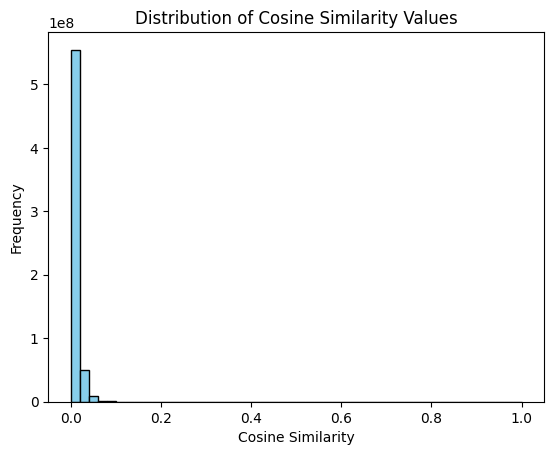

In [57]:
import matplotlib.pyplot as plt
plt.hist(cos_sim.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Values')
plt.show()

In [83]:
get_recommendations('The Dark Knight', cos_sim, data)

[(11370, 0.38450448976000184), (6831, 0.30411792012459044), (965, 0.23428979771888123), (112, 0.19786867963058138), (15145, 0.1561496702465134), (22956, 0.15520950593226404), (455, 0.13538674022056138), (2381, 0.11762092710829916), (13393, 0.1116736301860908), (3141, 0.10958138893058224), (11304, 0.10588257430995875), (7577, 0.10493116316545702), (7809, 0.09673538589817607), (19871, 0.09644056909444543), (9144, 0.09583019013778331), (23640, 0.09266183147577196), (13975, 0.08532710387146977), (7612, 0.08354267075914627), (8140, 0.0831882393659846), (19635, 0.08301407428557711)]


11370    The Dark Knight Rises
6831             Batman Begins
965             Batman Returns
112             Batman Forever
15145        Batman vs Dracula
22956    The Lego Batman Movie
455                     Batman
2381                       JFK
13393           The Super Cops
3141              Criminal Law
11304         Batman and Robin
7577              The Prestige
7809                 Slow Burn
19871       Starring Adam West
9144                  Fighting
23640                 Stingray
13975            Son of Batman
7612               Harsh Times
8140                  Ricochet
19635            Batkid Begins
Name: original_title, dtype: object

A améliorer : 
- Recuperer les scores de recommendation
- Faire des sous fonctions en fonction des cas

# Implementation finale

In [12]:
dictionnary = {'target_movie_title': "I'd like a movie like Interstellar", 'topic': 'I would like a movie with a story of ninjas', 'genre': "I'd like a romantic movie", 'set': {'composer': "I'd lile a movie with the music composed by Hans Zimmer", 'cast': ["I'd like a movie starring Matt Daemon"]}}

In [3]:
dictionnary = {'target_movie_title': "I'd like a movie like Little Miss Sunshine", 'set': {'cast': ["I'd like a movie with Christian Bale"]}}

In [13]:
import spacy
import joblib
def extract_entities_from_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

In [14]:
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def find_genre(sentence, expanded_keywords):
    words = [lemmatizer.lemmatize(word.lower()) for word in re.split(r'\W+', sentence) if word]
    words = [word for word in words if word not in ['film', 'movie']]
    for genre, keywords in expanded_keywords.items():
        if any(word in words for word in keywords):
            return genre
    return None

In [15]:
from fuzzywuzzy import process

def find_closest_match_fuzzy(input_entity, database_entities):
    closest_match, score = process.extractOne(input_entity, database_entities)
    if score < 70:  
        return None  
    return closest_match

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python37\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [16]:
def get_list_data (column_name, data) :
    liste_data = set()
    for genres_list in data[column_name]:
        genres_list = eval(genres_list)  
        liste_data.update(genres_list)
    return liste_data

In [17]:
def similarity_extraction_in_dict(dictionnary, data):
    new_dict = {}
    for key, value in dictionnary.items():
        if isinstance(value, str) and key !='topic' and key !='genre':
            entities = extract_entities_from_text(value)
            entity = entities[0]
            if key == 'target_movie_title':
                entity = find_closest_match_fuzzy(entity, data['original_title'].tolist())
            elif key =='director': 
                all_directors = get_list_data('director', data)
                entity = find_closest_match_fuzzy(entity, all_directors)
            else : 
                entity = entity
            new_dict[key]= entity
        elif isinstance(value, dict):
            new_dict[key] = similarity_extraction_in_dict(value,data)
        elif isinstance(value,list):
            for elem in value : 
                entities = extract_entities_from_text(elem)
                entity = entities[0]
                all_actors = get_list_data('cast', data)
                entity = find_closest_match_fuzzy(entity, all_actors)
            new_dict[key]= entity
        elif isinstance(value, str) and key == 'genre': 
            expanded_keywords = joblib.load('expanded_keywords.pkl')
            entity = find_genre(value,expanded_keywords)
            new_dict[key]= entity
        else:
            new_dict[key] = value
    return new_dict

In [23]:
def get_recommendations_from_title(dict, data):
    title = dict['target_movie_title']
    indices = pd.Series(data.index, index=data['original_title']).drop_duplicates()
    # Get the index of the movie that matches the title
    index = indices[title]
    # Some movies have the same name we will keep only the most popular movie with this name
    if isinstance(index, pd.Series):
        popularity = 0
        for id in index : 
            current_popularity = data['popularity'][id]
            if current_popularity > popularity : 
                popularity = current_popularity
                index = id

    # Apply filters before computing similarity
    filtered_data = data.copy()
    for key, value in dict.items():
        if 'set' == key : 
            for second_key, second_value in value.items() :
                if 'cast' == second_key: 
                    filtered_data = filter_by_cast(filtered_data, second_value)
                elif 'director' == second_key: 
                    filtered_data = filter_by_director(filtered_data, second_value)
        if 'genre' == key :
            filtered_data = filter_by_genre(filtered_data, value)
                    
    filtered_indices = filtered_data.index.tolist()
    cos_sim = joblib.load('matrix_similarity.pkl')
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = [(i, cos_sim[index][i]) for i in filtered_indices]
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    similar_movies = []
    # Loop until we have at least 20 similar movies or we have checked all movies
    i = 0
    while len(similar_movies) < 20 and i < len(sim_scores) and i < len(filtered_data):
        if data.iloc[sim_scores[i][0]]['original_title'] != title:
            similar_movies.append((sim_scores[i][0], sim_scores[i][1]))
        i += 1

    # Get the movie indices
    movie_indices = [i[0] for i in similar_movies]

    # Return the top 20 most similar movies after applying filters
    return list(set(data['original_title'].iloc[movie_indices].head(20).tolist()))


In [19]:
def filter_by_cast(data, value):
    mask = data['cast'].apply(lambda x: value in x)
    filtered_data = data[mask]
    return filtered_data


In [20]:
def filter_by_director(data, value):
    mask = data['director'].apply(lambda x: value in x)
    filtered_data = data[mask]
    return filtered_data


In [21]:
def filter_by_genre(data, value):
    mask = data['genres'].apply(lambda x: value in x)
    filtered_data = data[mask]
    return filtered_data

In [22]:
def get_recommendations(dictionnary, data):
    final_dictionnary = similarity_extraction_in_dict(dictionnary,data)
    print(final_dictionnary)
    keys = final_dictionnary.keys()
    if 'target_movie_title' in keys : 
        recommendation = get_recommendations_from_title(final_dictionnary, data)
    else : 
        filtered_data = data.copy()
        for key, value in final_dictionnary.items():
            if 'set' == key : 
                for second_key, second_value in value.items() :
                    if 'cast' ==second_key: 
                        filtered_data =  filter_by_cast(filtered_data, second_value)
                    elif 'director' ==second_key: 
                        filtered_data = filter_by_director(filtered_data, second_value)
                    else : 
                        filtered_data
            if 'genre' ==key : 
                filtered_data = filter_by_genre(filtered_data, value)
        filtered_data = filtered_data.sort_values(by='popularity', ascending=False)
        recommendation = filtered_data['original_title'].head(20).tolist()
    return recommendation


In [24]:
get_recommendations(dictionnary, data)

{'target_movie_title': 'Interstellar', 'topic': 'I would like a movie with a story of ninjas', 'genre': 'Romance', 'set': {'composer': 'Hans Zimmer', 'cast': 'Matt Damon'}}


['All the Pretty Horses',
 'Confessions of a Dangerous Mind',
 'The Third Wheel',
 'The Adjustment Bureau',
 'Behind the Candelabra',
 'Chasing Amy',
 'The Majestic',
 'Jersey Girl',
 'Mystic Pizza']